In [1]:
import os
os.chdir('..')  # Mueve el directorio de trabajo un nivel arriba    ]



In [2]:
os.getcwd()  # Muestra la ruta actual


'c:\\Users\\esmaru\\Desktop\\Esteban\\repos\\mestrado_thz_physics'

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from scipy.signal import find_peaks
import scipy.signal.windows as win
import scipy as sp
import warnings
import re
from ipywidgets import interact,widgets
from scipy.optimize import curve_fit
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc
from scipy.misc import derivative
from functions_master import *
import warnings

# Suprimir FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def FourierT2(f,N):
    return np.conj(sp.fft.fft(f.values,n=N))


In [4]:
# Configuración desde el archivo txt (simulada aquí como un diccionario)
config = {
    'figure.constrained_layout.use': True,
    'figure.figsize': (5.4, 3.2),
    'figure.titlesize': 'small',
    'figure.labelsize': 'small',
    'font.size': 10,
    'font.family': 'serif',
    'text.usetex': False,
    'pgf.texsystem': 'lualatex',
    'pgf.rcfonts': False,
    'pgf.preamble': r'\usepackage{siunitx,fontspec}\setmainfont{Times New Roman}',
    'lines.linewidth': 1,
    'lines.markerfacecolor': 'none',
    'lines.markersize': 4,
    'legend.frameon': False,
    'legend.markerscale': 0.8,
    'legend.fontsize': 'small',
    'legend.title_fontsize': 'small',
    'legend.handlelength': 1.5,
    'legend.handletextpad': 0.2,
    'xtick.top': True,
    'xtick.major.size': 5,
    'xtick.major.width': 0.8,
    'xtick.minor.width': 0.8,
    'xtick.minor.size': 3,
    'xtick.labelsize': 'small',
    'xtick.direction': 'in',
    'ytick.right': True,
    'ytick.major.size': 5,
    'ytick.major.width': 0.8,
    'ytick.minor.width': 0.8,
    'ytick.minor.size': 3,
    'ytick.labelsize': 'small',
    'ytick.direction': 'in',
    'axes.linewidth': 0.8,
    'axes.axisbelow': False,
    'axes.labelsize': 'medium',
    'axes.labelpad': 2,
    'figure.constrained_layout.h_pad': 0.02,
    'figure.constrained_layout.w_pad': 0.01,
    'figure.constrained_layout.hspace': 0.02,
    'figure.constrained_layout.wspace': 0.02,
    'svg.fonttype': 'none'
}

# Aplicar la configuración
plt.rcParams.update(config)

In [5]:
ruta_actual = os.getcwd()

carpeta = os.path.join(ruta_actual, 'PbTe', '20-20')

#rf'C:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbTe\20-20'
carpeta_ref = os.path.join(ruta_actual,"PbTe","substrate","20-20")
#carpeta_ref = rf'C:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbTe\substrate\20-20'

archivos_dat = glob.glob(os.path.join(os.path.join(carpeta,'carpeta1'), '*.dat'))


archivos_dat_ref = glob.glob(os.path.join(os.path.join(carpeta_ref,'carpeta1'), '*.dat'))

# Elimina cada archivo
for archivo in archivos_dat:
    os.remove(archivo)
    #print(f'Archivo {archivo} eliminado.')

for archivo in archivos_dat_ref:
    os.remove(archivo)
    #print(f'Archivo {archivo} eliminado.')

warnings.simplefilter(action='ignore', category=FutureWarning)

N = 4 # Variable para agrupar datos de temperatura de N en N datos 

convert_dats(carpeta,N)
convert_dats(carpeta_ref,N)

Archivo c:\Users\esmaru\Desktop\Esteban\repos\mestrado_thz_physics\PbTe\20-20\carpeta1\Average_10.0K.dat generado en c:\Users\esmaru\Desktop\Esteban\repos\mestrado_thz_physics\PbTe\20-20\carpeta1.
Archivo c:\Users\esmaru\Desktop\Esteban\repos\mestrado_thz_physics\PbTe\20-20\carpeta1\Average_20.0K.dat generado en c:\Users\esmaru\Desktop\Esteban\repos\mestrado_thz_physics\PbTe\20-20\carpeta1.
Archivo c:\Users\esmaru\Desktop\Esteban\repos\mestrado_thz_physics\PbTe\20-20\carpeta1\Average_40.0K.dat generado en c:\Users\esmaru\Desktop\Esteban\repos\mestrado_thz_physics\PbTe\20-20\carpeta1.
Archivo c:\Users\esmaru\Desktop\Esteban\repos\mestrado_thz_physics\PbTe\20-20\carpeta1\Average_60.0K.dat generado en c:\Users\esmaru\Desktop\Esteban\repos\mestrado_thz_physics\PbTe\20-20\carpeta1.
Archivo c:\Users\esmaru\Desktop\Esteban\repos\mestrado_thz_physics\PbTe\20-20\carpeta1\Average_80.0K.dat generado en c:\Users\esmaru\Desktop\Esteban\repos\mestrado_thz_physics\PbTe\20-20\carpeta1.
Archivo c:\User

In [21]:
#path_analisis = r'C:\Users\usuario_trabajo\Desktop\physics\TESIS\20-20\20-20\carpeta1'
path_analisis = os.path.join(carpeta,'carpeta1')
path_analisis_ref = os.path.join(carpeta_ref,'carpeta1')

# Obtener lista de archivos .dat en la carpeta
archivos = os.listdir(path_analisis)
archivos2 = os.listdir(path_analisis_ref)

# Filtrar y ordenar los archivos por la temperatura
archivos_ordenados_s = sorted(
    archivos,
    key=lambda x: extraer_temperatura(x)
)

archivos_ordenados_ref = sorted(
    archivos2,
    key=lambda x: extraer_temperatura(x)
)

colors = plt.cm.jet(np.linspace(0, 1, len(archivos_ordenados_s)))[::-1]

# bis = [0.02,0.03,0.06,0.07,0.1,0.15] # Porcentaje de Bismuto.

delta_ls = {"20-20": 0.446-0.360, # Substrato - mostra. (Mostra = substrato + FILM ) FILM -> OBJETO DE ESTUDIO. BaF2
}  # SINN BISMUTO.

sample = "20-20"
d = 0.0025

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

left,right_sample,right_subs,index,correc_subs,desv = 380,391.5,390,0,-0.028,50
params_window1 = ['gaussian', desv]
params_window2 = ['flattop']
params_window3 = ['barthann']
ventanas = [params_window1,params_window2,params_window3]
colors = ['red','gray','darkgreen']
names = [params_window1[0],params_window2[0],params_window3[0]]

path_signal = os.path.join(path_analisis,archivos_ordenados_s[int(index)])
path_ref = os.path.join(path_analisis_ref ,archivos_ordenados_ref[int(index)])



3


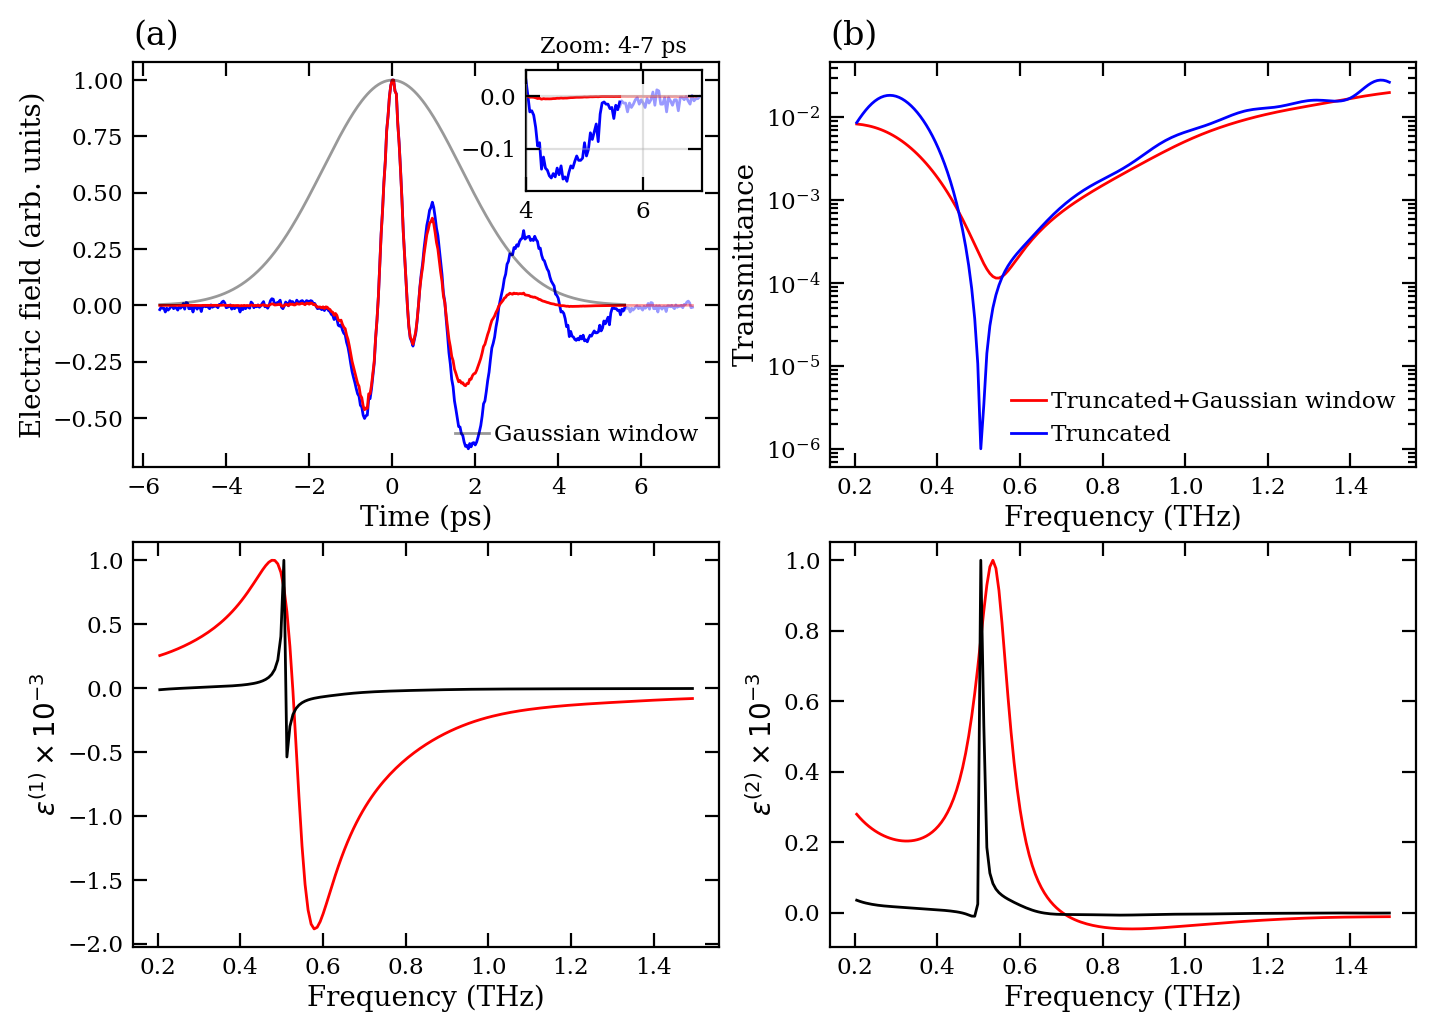

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset



f = plt.figure(figsize=(7, 5),dpi=200)

N = 2**12


for count,j in enumerate(ventanas):  

    phase, y_signal_ventaneada, y_substrate_padding, ventana = getSignalWindowed(path_signal,path_ref,left,right_sample,right_subs,j)

    plt.subplot(221)

    x,y = getFilterdata(path_signal,right_sample,left)
    x_ref,y_ref = getFilterdata(path_ref,right_subs,left)
    x = x-x.iloc[len(x)//2]
    x_ref = x_ref - x_ref.iloc[len(x_ref) // 2]

    x_min, x_max = np.min(x), np.max(x)
    period = x_max - x_min  # Longitud del período
    n_repeats = 1
    x_right = [x + period * i for i in range(1, n_repeats + 1)]
    x_periodic = np.concatenate([x] + x_right)
    y_periodic = np.tile(y_signal_ventaneada,n_repeats + 1)  

    dis = abs(x.iloc[-1] - x.iloc[0])
    plt.plot(x,y_signal_ventaneada/max(y_signal_ventaneada),'b')

    x_periodic = x+dis
    y_periodic = y_signal_ventaneada/max(y_signal_ventaneada)
    plt.plot(x_periodic[:50],y_periodic[:50],'b',alpha=0.4)
    # plt.plot(y_periodic/max(y_periodic),'b', alpha=0.4)
    # Datos sin ventana.

    y_signal_notwindow = y_signal_ventaneada.copy()

    y_subs_ventana = pd.Series(y_substrate_padding*ventana)
    y_signal_ventaneada = pd.Series(y_signal_ventaneada*ventana)

    plt.plot(x,y_signal_ventaneada/max(y_signal_ventaneada), colors[count], label=f'{names[count]} window')
    plt.plot(x_periodic[:50],y_signal_ventaneada[:50]/max(y_signal_ventaneada), colors[count],alpha=0.4)
    # plt.plot(x,ventana/max(ventana),'k',alpha=0.4,label='Gaussian window')
    plt.legend(loc='lower right')


    plt.title('(a)', loc='left')
    plt.xlabel('Time (ps)')
    plt.ylabel('Electric field (arb. units)')



    # plt.plot(x,y_signal_ventaneada/max(y_signal_ventaneada),'k')
    nn = -220
    # plt.plot(x_periodic[:nn], (y_periodic/max(y_periodic))[:nn], color='blue')
    # plt.plot(x_ext,y_signal_ventaneada/max(y_signal_ventaneada),'r',label=f'Sample signal+Window+rectangle window')
    # print((x_ext[1]-x_ext[0]))


    # Configurar los límites de la lupa

    # Configurar los límites de la lupa
    zoom_xlim = (4,7)

    # Crear máscaras para cada señal en el rango de zoom
    mask_x = (x >= zoom_xlim[0]) & (x <= zoom_xlim[1])
    mask_x_periodic = (x_periodic >= zoom_xlim[0]) & (x_periodic <= zoom_xlim[1])
    # mask_x_ext = (x_ext >= zoom_xlim[0]) & (x_ext <= zoom_xlim[1])

    # Obtener los valores de Y para cada señal en el rango de zoom
    y1_zoom = y_signal_notwindow[mask_x]/max(y)
    y2_zoom = (y_periodic/max(y_periodic))[mask_x_periodic]
    y3_zoom = (y_signal_ventaneada/max(y_signal_ventaneada))[mask_x]


    nnn = 40
    y4_zoom = (y_signal_ventaneada[:nnn]/max(y_signal_ventaneada))

    # Calcular los límites Y considerando todas las señales
    y_min = min(np.min(y1_zoom), np.min(y2_zoom), np.min(y3_zoom))
    y_max = max(np.max(y1_zoom), np.max(y2_zoom), np.max(y3_zoom))
    margin = 0.1 * (y_max - y_min)  # 10% de margen

    # Crear la lupa
    ax = plt.gca()
    ax_inset = inset_axes(ax, width="30%", height="30%", loc='upper right', 
                        bbox_to_anchor=(-0.03,-0.02, 1, 1),
                        bbox_transform=ax.transAxes, borderpad=0)


    # Graficar solo los datos en el rango de zoom (mejor rendimiento)
    ax_inset.plot(x[mask_x], y1_zoom, 'blue', label='Señal rectangular')
    ax_inset.plot(x_periodic[mask_x_periodic], y2_zoom, color='blue', alpha=0.4, label='Señal periódica')
    ax_inset.plot(x[mask_x], y3_zoom, 'r', label='Señal ventaneada')
    ax_inset.plot(x_periodic[:nnn], y4_zoom ,  colors[count], alpha=0.4, label='Señal ventaneada')

    # Configurar los límites con margen
    ax_inset.set_xlim(zoom_xlim)
    ax_inset.set_ylim(y_min - margin, y_max + margin)

    # Añadir elementos de estilo
    ax_inset.grid(True, alpha=0.4)
    ax_inset.set_title(f'Zoom: {zoom_xlim[0]}-{zoom_xlim[1]} ps', fontsize=8)
    # ax_inset.legend(fontsize=6)




    k = 15
    nu = sp.fft.fftfreq(N, 1/30)
        # Aplicar ventana de Hamming a la señal



    # Transformada de Fourier de las señales
    fft_y_signal_ventaneada = FourierT2(y_signal_ventaneada,N)[1:len(nu)//k]
    fft_y_subs_ventaneada = FourierT2(y_subs_ventana,N)[1:len(nu)//k]

    fft_y_signal= FourierT2(y,N)[1:len(nu)//k]
    fft_y_subs = FourierT2(y_ref,N)[1:len(nu)//k]

    fft_window = FourierT2(pd.Series(ventana),N)[1:len(nu)//k]

        # Filtrar las frecuencias
    nu = nu[1:len(nu)//k]
    xmin, xmax = 0.2, 1.5
    mask = (nu >= xmin) & (nu <= xmax)
    nu_filtradas = nu[mask]
    fft_y_signal_ventaneada = fft_y_signal_ventaneada[mask]
    fft_y_subs_ventaneada = fft_y_subs_ventaneada[mask]

    fft_y_signal= fft_y_signal[mask]
    fft_y_subs = fft_y_subs[mask]
    fft_window = fft_window[mask]

    global delta_ls_corr

    delta_ls_corr = delta_ls[sample] + correc_subs
    T_ventana = (fft_y_signal_ventaneada/fft_y_subs_ventaneada)*np.exp(2*np.pi*1j*nu_filtradas/c*(1-2.6)*delta_ls_corr)*np.exp(1j*2*np.pi*nu_filtradas*phase*1/30)
    T = (fft_y_signal/fft_y_subs)*np.exp(2*np.pi*1j*nu_filtradas/c*(1-2.6)*delta_ls_corr)
    n = 2.6
    ep_con = 1j*(1+n)*((1/T_ventana)-1)*c/(2*np.pi*nu_filtradas*d)-n
    ep_sin = 1j*(1+n)*((1/T)-1)*c/(2*np.pi*nu_filtradas*d)-n


    plt.subplot(222)

    plt.plot(nu_filtradas, np.abs(T_ventana)**2, colors[count], label=f'Truncated+{names[count]} window')
    plt.plot(nu_filtradas, np.abs(T)**2, 'b',label='Truncated')
    plt.ylabel(r'Transmittance')
    plt.title('(b)', loc='left')
    plt.yscale('log')
    plt.xlabel(r'Frequency (THz)')
    plt.legend(loc='lower right')
    #plt.plot(nu_filtradas,np.abs(fft_window)/max(fft_window),'r',label='FFT window')


    # plt.yscale('log')
    # #plt.xlabel(r'$\nu$ [THz]',fontsize=15)
    # # plt.legend()

    plt.subplot(223)
    plt.plot(nu_filtradas, np.real(ep_con)/max(np.real(ep_con)),  colors[count])
    plt.plot(nu_filtradas, np.real(ep_sin)/max(np.real(ep_sin)), 'b',label='Rectangular windows')
    plt.ylabel(r'$\epsilon^{(1)}\times 10^{-3}$')
    plt.xlabel(r'Frequency (THz)')



    plt.subplot(224)
    plt.plot(nu_filtradas, np.imag(ep_con)/max(np.imag(ep_con)),  colors[count])
    plt.plot(nu_filtradas, np.imag(ep_sin)/max(np.imag(ep_sin)),'b',label='Rectangle window')
    plt.xlabel(r'Frequency (THz)')
    #plt.yscale('log')
    plt.ylabel(r'$\epsilon^{(2)}\times 10^{-3}$')
    #plt.title(f'Delta sample real:{round(delta_ls[sample],4)}, Delta sample correg: {round(delta_ls_corr,5)}')
    # plt.legend()

    # plt.savefig("fig3.png", dpi=300, bbox_inches='tight', format='png')
    

    plt.show()

